In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Carregar a imagem do fundo verde
imagem_fundo_verde = cv2.imread('projeto_1-20250429T223651Z-001/img_fundo_verde_3.png')
imagem_fundo_verde = cv2.cvtColor(imagem_fundo_verde, cv2.COLOR_BGR2RGB)  # Convertendo para RGB

# Carregar a imagem do novo fundo (substitua com o seu diretório)
cenario = cv2.imread('projeto_1-20250429T223651Z-001/background_2.png')
cenario = cv2.cvtColor(cenario, cv2.COLOR_BGR2RGB)  # Convertendo para RGB

In [3]:
# Redimensionar o novo fundo para o tamanho da imagem com fundo verde
cenario = cv2.resize(cenario, (imagem_fundo_verde.shape[1], imagem_fundo_verde.shape[0]))

In [4]:
# Definir os limites de cor para detectar o fundo verde

verde_menor = np.array([35, 35, 80])  # Limite inferior da cor verde no espaço de cor HSV
verde_maior = np.array([85, 255, 255])  # Limite superior da cor verde no espaço de cor HSV

In [5]:
# Converter a imagem para o espaço de cor HSV
imagem_hsv = cv2.cvtColor(imagem_fundo_verde, cv2.COLOR_RGB2HSV)

# Criar uma máscara para a cor verde
mascara = cv2.inRange(imagem_hsv, verde_menor, verde_maior)

# Inverter a máscara para pegar a área que NÃO é verde
mascara_invertida = cv2.bitwise_not(mascara)

# Extrair a área da imagem original sem o fundo verde
imagem_sem_fundo = cv2.bitwise_and(imagem_fundo_verde, imagem_fundo_verde, mask=mascara_invertida)

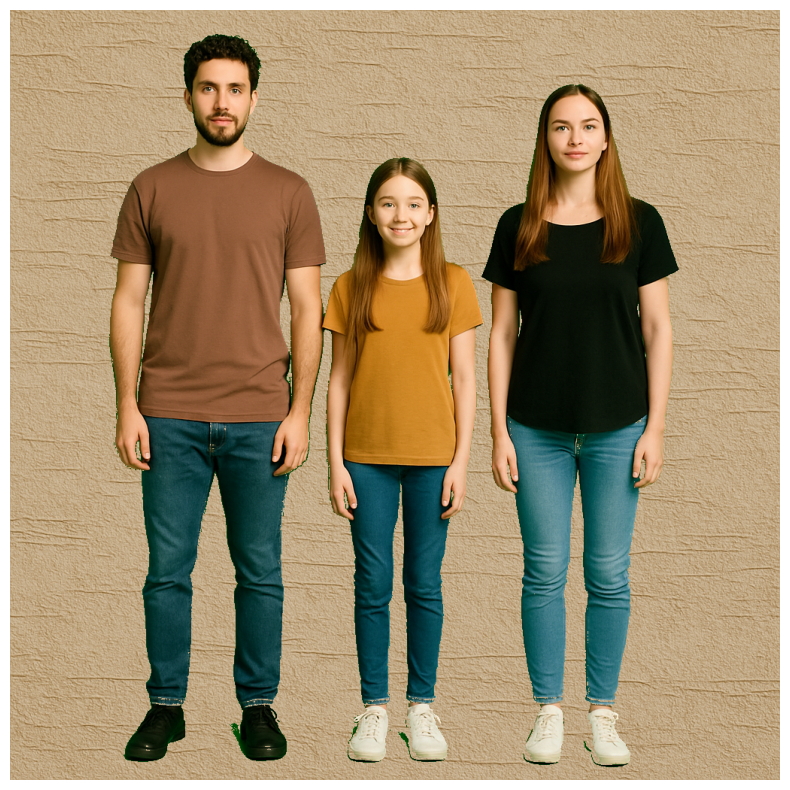

In [29]:
# Extrair a área do novo fundo
cenario_aplicado = cv2.bitwise_and(cenario, cenario, mask=mascara)

# Combinar as duas imagens (imagem sem fundo + novo fundo)
imagem_resultado = cv2.add(imagem_sem_fundo, cenario_aplicado)

# Mostrar a imagem final usando matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(imagem_resultado)
plt.axis('off')  # Desligar os eixos
plt.show()